# Binomial Logistic Regression

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns


In [2]:
data = pd.read_csv('userBdata.csv')

In [3]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
X = data[['Age']]
y = data[['Purchased']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=42)

In [8]:
clf = LogisticRegression().fit(X_train, y_train)  #clf: classifier

/Users/usuario/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
clf.coef_

array([[0.17169841]])

In [10]:
clf.intercept_

array([-7.40947373])

In [11]:
clf.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [12]:
clf.predict_proba(X_test)[::,-1]  #will allow we to check what probability was predicted for each data point

array([0.61978905, 0.93823898, 0.06901506, 0.69678817, 0.08089711,
       0.09461694, 0.65933931, 0.08089711, 0.36783   , 0.45062626,
       0.19781143, 0.8442954 , 0.03045991, 0.01842399, 0.09461694,
       0.19781143, 0.8203681 , 0.61978905, 0.32888422, 0.90075458,
       0.02577823, 0.08089711, 0.65933931, 0.93823898, 0.01556253,
       0.79366247, 0.45062626, 0.25795347, 0.88431462, 0.01556253,
       0.61978905, 0.01556253, 0.22647365, 0.06901506, 0.36783   ,
       0.19781143, 0.25795347, 0.29215632, 0.0499584 , 0.01313954,
       0.69678817, 0.03596047, 0.01313954, 0.65933931, 0.01842399,
       0.53625032, 0.08089711, 0.11038415, 0.69678817, 0.1719702 ,
       0.04241089, 0.8442954 , 0.29215632, 0.04241089, 0.25795347,
       0.05876664, 0.94747098, 0.0499584 , 0.11038415, 0.11038415,
       0.40857991, 0.19781143, 0.8203681 , 0.06901506, 0.06901506,
       0.05876664, 0.45062626, 0.65933931, 0.32888422, 0.14887825,
       0.8203681 , 0.01556253, 0.05876664, 0.03045991, 0.65933

In [13]:
y_pred = clf.predict(X_test)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

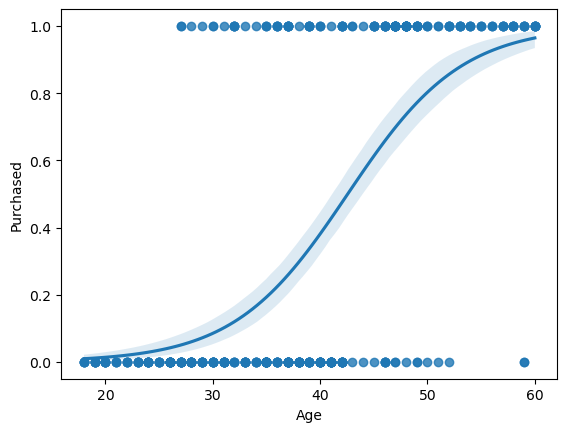

In [14]:
sns.regplot(x='Age', y='Purchased', data=data, logistic=True)

**Confusion matrix**

A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable. Displays how many data points were accurately categorized.

In [15]:
import sklearn.metrics as metrics

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [17]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=clf.classes_)

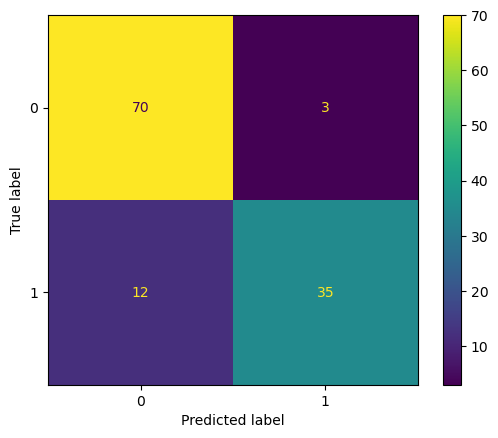

In [18]:
disp.plot()

Yellow: True Negatives.  
Green: True Positives.  
purple: (3) False positive.  
purple: (12) False Negatives

**Evaluation metrics**

**1.Precision**

The proportion of positive predictions that were true positives.  

Precision = True Positives / True Positives + False Positives

In [19]:
import sklearn.metrics as metrics
metrics.precision_score(y_test, y_pred)

0.9210526315789473

**2.Recall**

The proportion of positives the model was able to identify correcty.  

Recall = True positives / True Positives + False Negatives

In [20]:
metrics.recall_score(y_test, y_pred)

0.7446808510638298

**3.Accuracy**

The proportion of data points that were correctly caategorized.  

Accuracy = True Positives + True Negatives / Total Predictios

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.875

**ROC Curves**

A ROC curve helps visualizing the performance of a logistic regression classfier. A ROC curve plots two key concepts:  
1.*True Positive Rate*: equivalent a *recall*. The formula for True Positive Rate is as follows:  
    
    TPR = True Positives / True Positives + False Negatives  
    
2.*False Positive Rate*:The ratio between the False Positives and the total count of obeservations that shoul be predicted as False. The formula for FPR is as follows:  

    FPR = False Positives / False Negatives + True Negatives

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

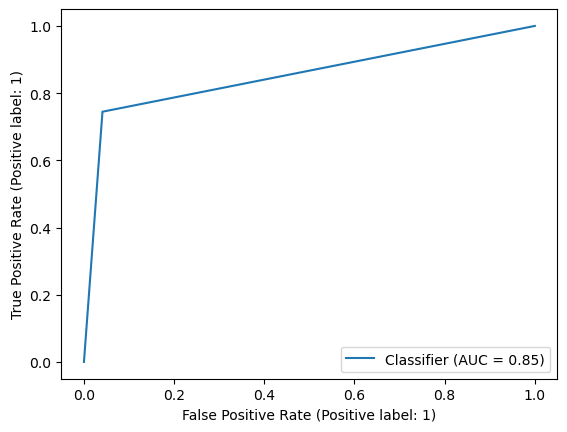

In [24]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

**AUC**

*AUC* provides an aggregate measure of performance across all possible classification thresholds. *AUC* ranges from 0.0 y0 1.0. 0.0 = 100 % wrong predictions; 1.0 = 100% correct predcitions.

In [26]:
metrics.roc_auc_score(y_test, y_pred).round(2)

0.85

In [27]:
clf.coef_

array([[0.17169841]])

In [29]:
import math

In [30]:
E = pow(math. e, clf.coef_)

In [31]:
E

array([[1.18731969]])

In [34]:
Result = E*100
Result

array([[118.73196906]])